# Task 2 : Decision Trees for Human Activity Recognition

In [1]:
import pandas as pd             #type: ignore
import numpy as np              #type: ignore
import matplotlib.pyplot as plt         #type: ignore
import seaborn as sns                   #type: ignore
from sklearn.preprocessing import StandardScaler       #type: ignore
from sklearn.model_selection import train_test_split   #type: ignore

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# importing the dataset
X = pd.read_csv('data_X.csv', delimiter=",", header=None)
y = pd.read_csv('data_y.csv', delimiter=",", header=None)

X = np.array(X)
y = np.array(y)

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (90000, 3)
y.shape:  (180, 1)


Ques 1.1 : Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [5]:
# we have 180 time series which are stored a flatten arrays, This is done for sklearn dtree implementation

X_comb= []           # Combined dataset
for i in range(180):
    X_comb.append(X[i*500: (i+1)*500, :].flatten())
X_comb = np.array(X_comb)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_comb, y, test_size=0.3, random_state=0)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (126, 1500)
X_test.shape:  (54, 1500)


decision tree model using raw accelerometer data: 

Accuracy:  0.63

Weighted Average Precision:
  0.64

Weighted Average Recall:
  0.63



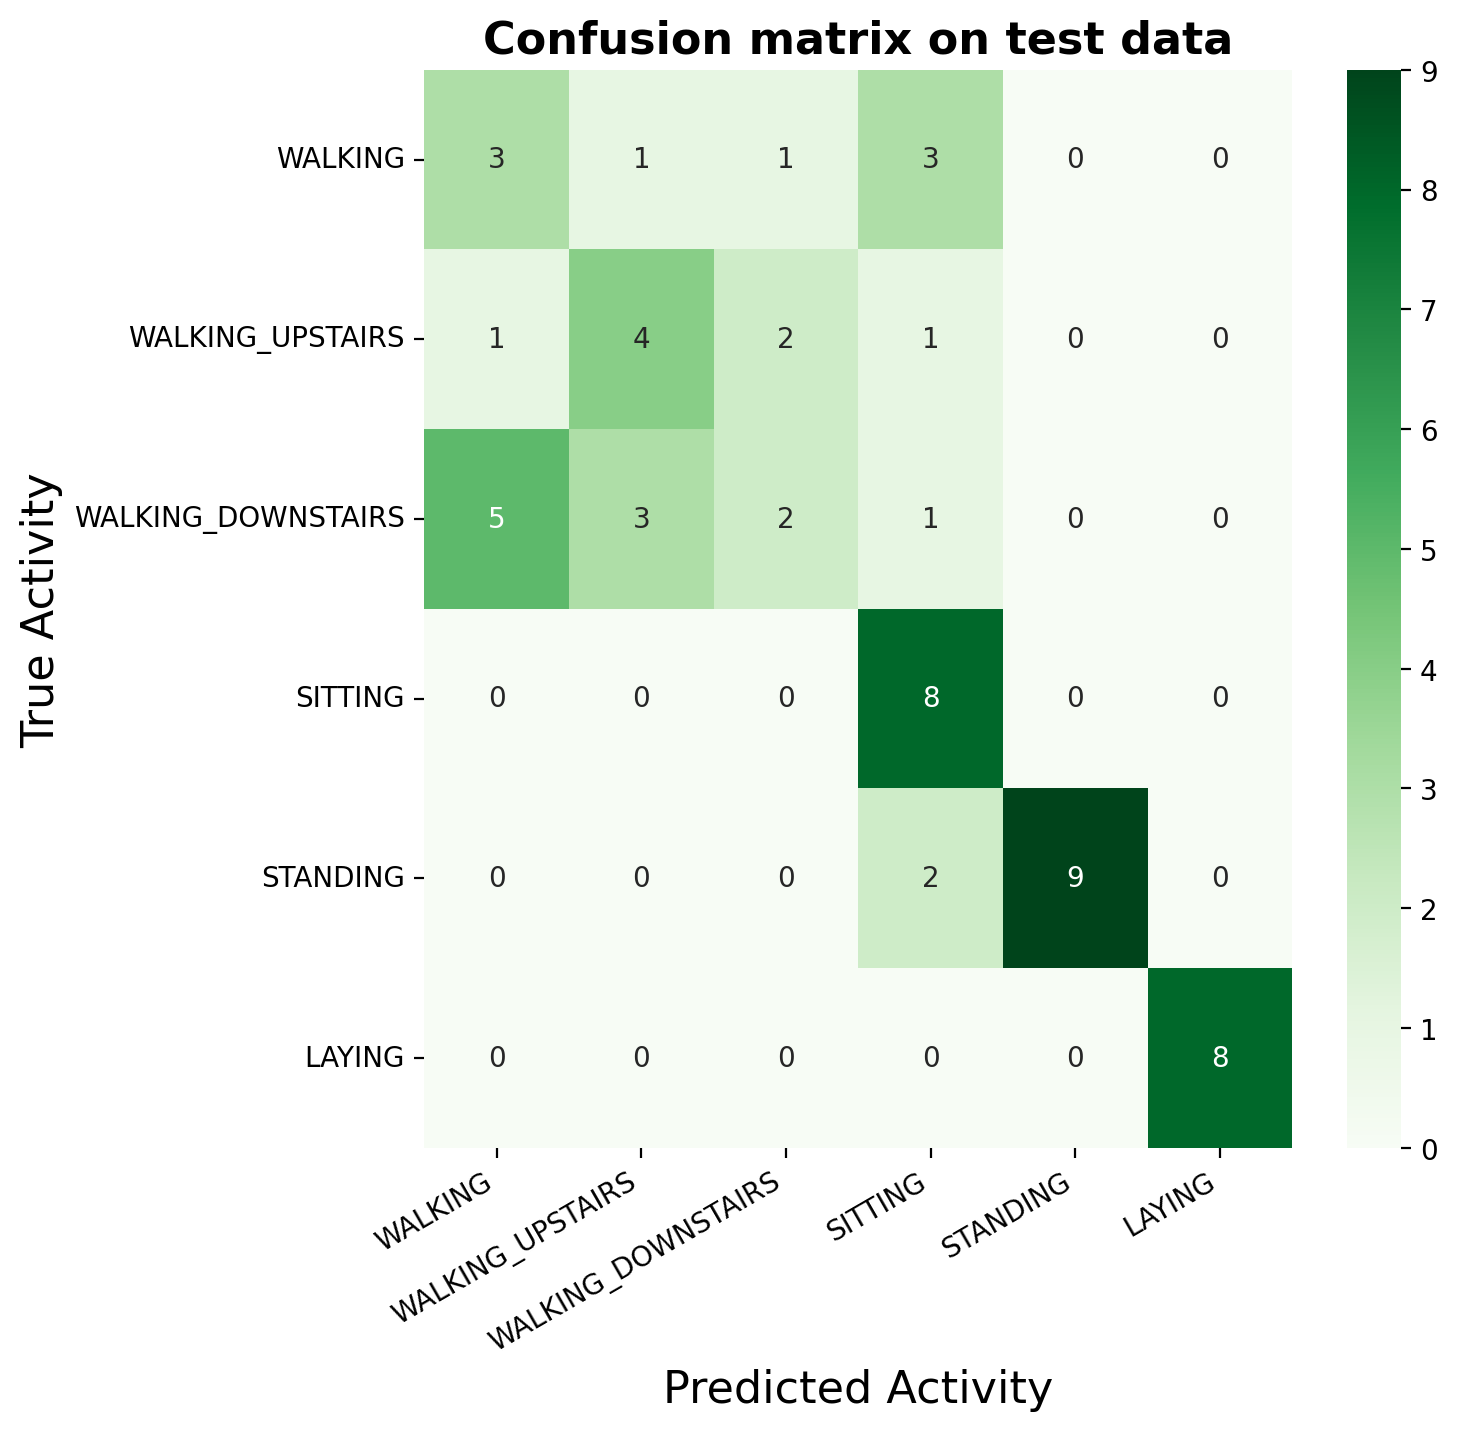

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix       
from sklearn.tree import DecisionTreeClassifier    

print("decision tree model using raw accelerometer data: \n")
dtmodel= DecisionTreeClassifier(random_state=0)

dtmodel.fit(X_train, y_train)

y_pred= dtmodel.predict(X_test)                 # a row vector numpy array

acc= accuracy_score(y_pred, y_test)
print("Accuracy: ", f"{acc:.2f}\n")

#average='weighted' Computes recall for each class and takes the weighted mean, where the weights are the number of true instances for each class
prec= precision_score(y_test, y_pred, average='weighted')
print("Weighted Average Precision:\n ", f"{prec:.2f}\n")

rec= recall_score(y_test, y_pred, average='weighted') 
print("Weighted Average Recall:\n ", f"{rec:.2f}\n")


confusion_mtx= confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize=(7,7))
sns.heatmap(confusion_mtx,annot=True, fmt= 'd', cmap= 'Greens', cbar= 'False', xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")

Ques 1.2 : Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [9]:
import tsfel

ts = tsfel.get_features_by_domain()
X_tsfel = tsfel.time_series_features_extractor(ts, X, fs=50, window_size=500)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_tsfel, y, test_size=0.3, random_state=0)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
X_train.shape:  (126, 1152)
X_test.shape:  (54, 1152)


decision tree model using features obtained by TSFEL: 

Accuracy:  0.87

Weighted Average Precision:  0.89

Weighted Average Recall:  0.870370



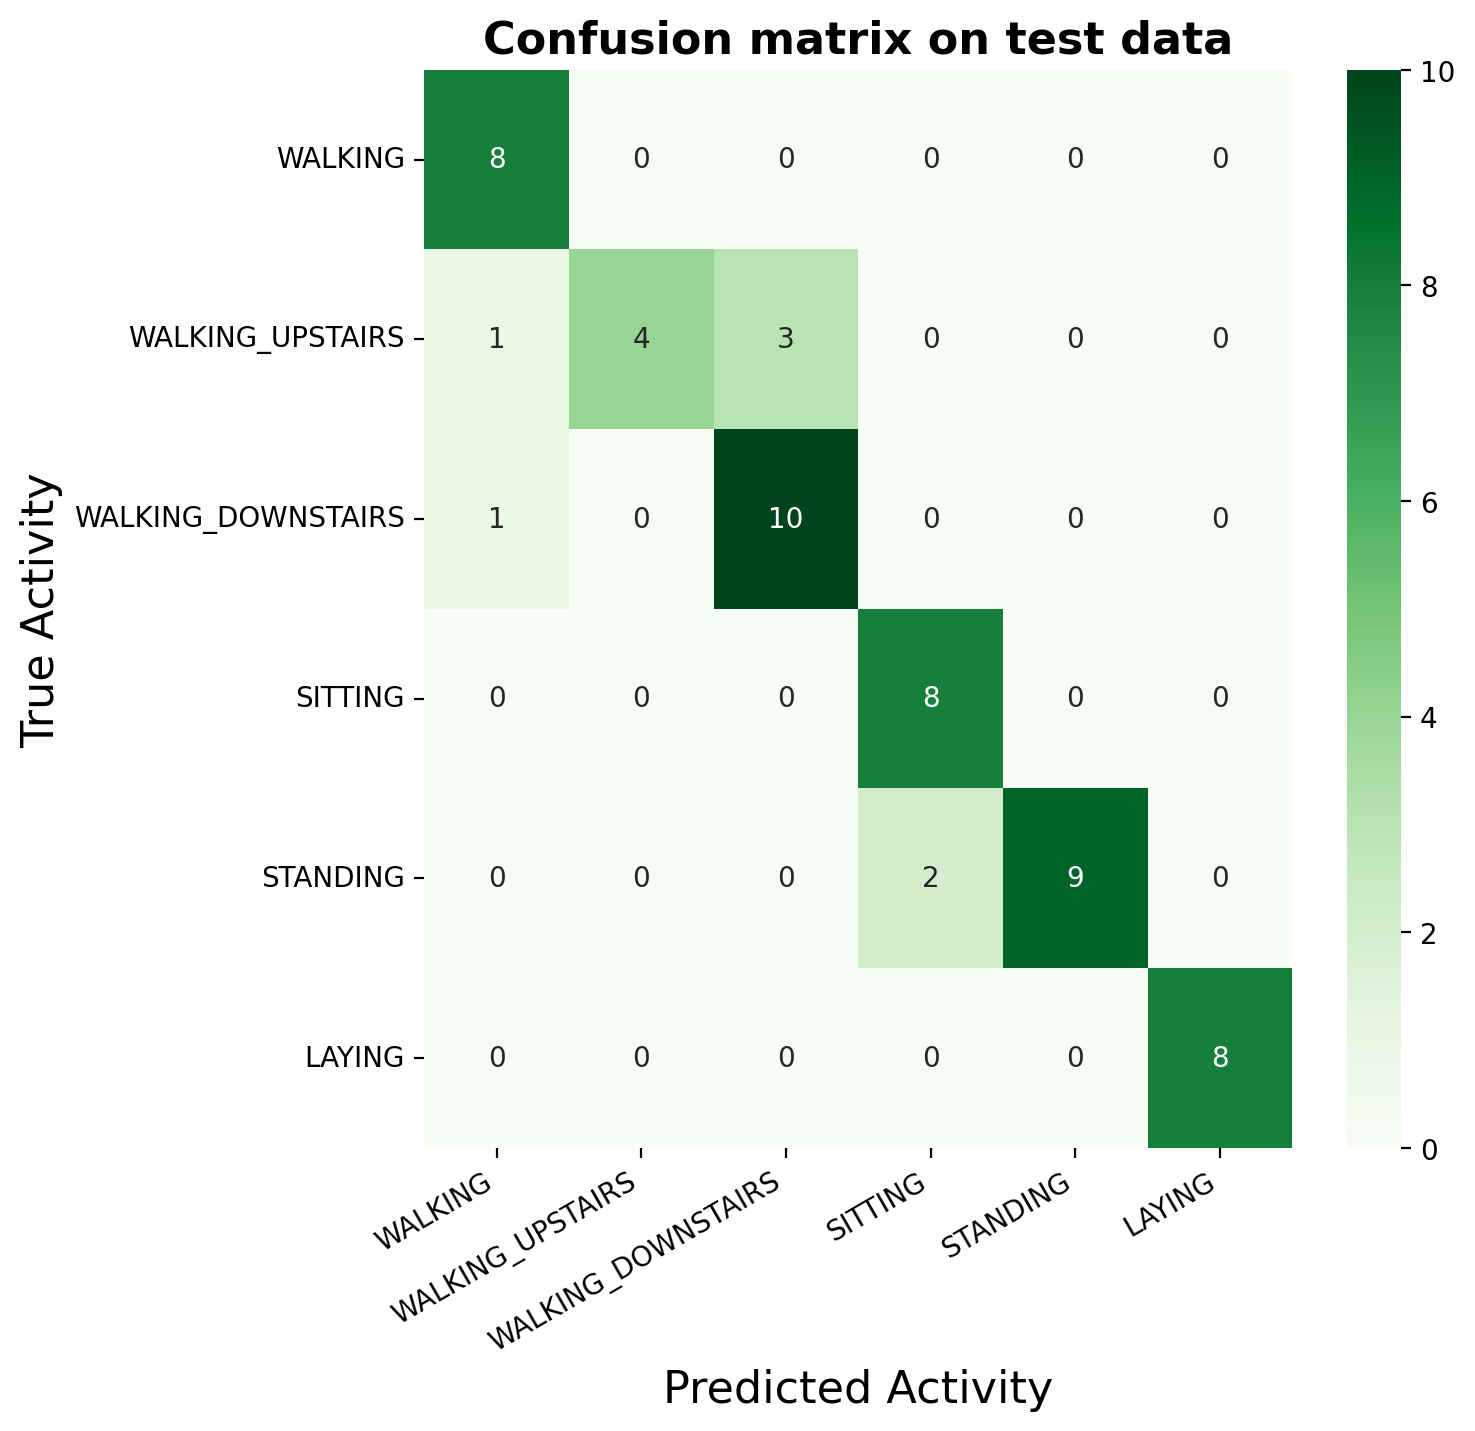

In [11]:
dtmodel= DecisionTreeClassifier(random_state=0)

dtmodel.fit(X_train, y_train)

y_pred= dtmodel.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

precision= precision_score(y_test, y_pred, average='weighted')

recall= recall_score(y_test, y_pred, average='weighted')

confusion_mtx= confusion_matrix(y_test, y_pred)

print("decision tree model using features obtained by TSFEL: \n")

print("Accuracy: ", f"{accuracy:.2f}\n")

print("Weighted Average Precision: ", f"{precision:.2f}\n")

print("Weighted Average Recall: ", f"{recall:2f}\n")

# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize=(7,7))
sns.heatmap(confusion_mtx,annot=True,cmap="Greens",fmt="d",cbar= 'False', xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")

Ques 1.3 : Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

Ques 2 : Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree

In [12]:
accuracy_arr1 = []

X_comb= []           # Combined dataset
for i in range(180):
    X_comb.append(X[i*500: (i+1)*500, :].flatten())
X_comb = np.array(X_comb)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_comb, y, test_size=0.3, random_state=0)

for depth in range(2,9):
    dtmodel= DecisionTreeClassifier(random_state=0, max_depth=depth)

    dtmodel.fit(X_train, y_train)

    y_pred= dtmodel.predict(X_test)                 # a row vector numpy array

    acc= accuracy_score(y_pred, y_test)
    
    accuracy_arr1.append(acc)

In [14]:
accuracy_arr2 = []

# ts = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(ts, X, fs=50, window_size=500)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_tsfel, y, test_size=0.3, random_state=0)

for depth in range(2,9):
    dtmodel= DecisionTreeClassifier(random_state=0, max_depth=depth)

    dtmodel.fit(X_train, y_train)

    y_pred= dtmodel.predict(X_test)

    acc= accuracy_score(y_test, y_pred)

    accuracy_arr2.append(acc)

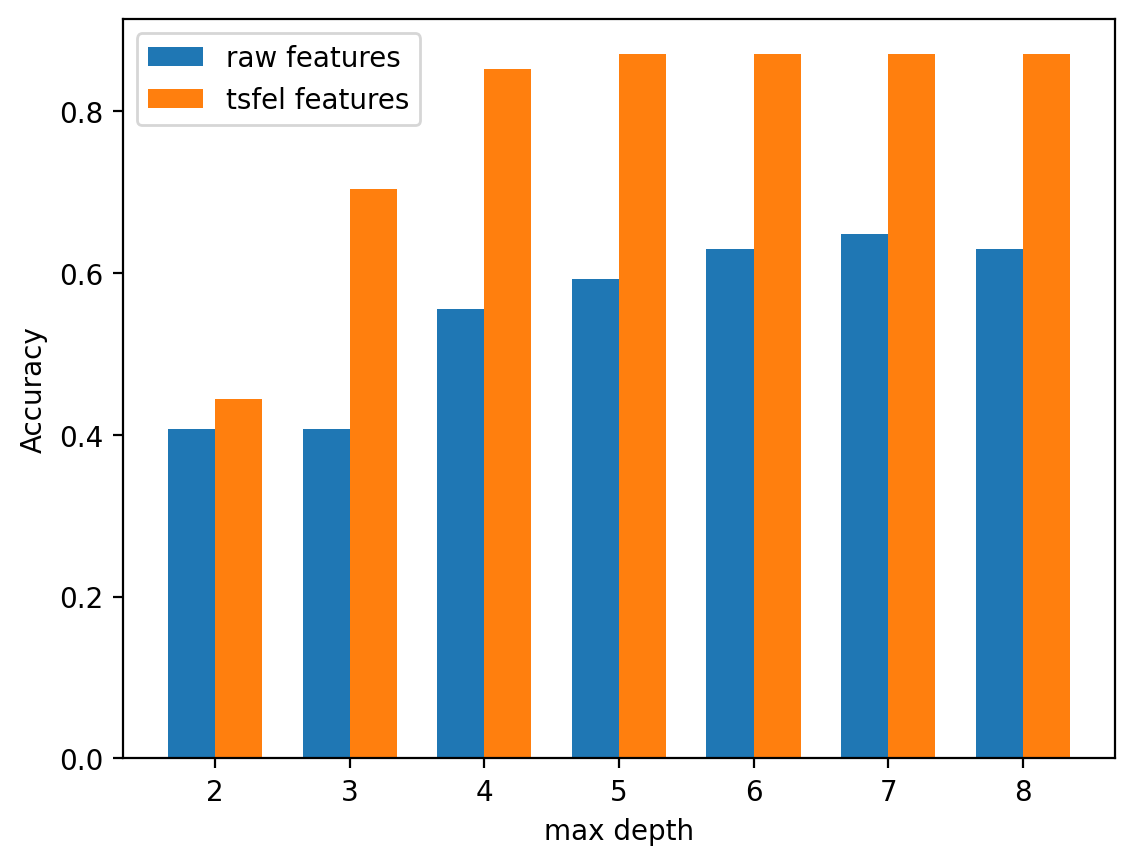

In [21]:
# plotting the graph

w = 0.35
plt.bar(np.arange(2,9)-w/2, accuracy_arr1 , width= w, label= 'raw features')
plt.bar(np.arange(2,9)+w/2, accuracy_arr2 , width= w, label= 'tsfel features')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.show()

Ques 3: Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]

Upon refereing to the confusion matrix for the decision tree classifier trained on tsfel features, it can be observed that the model performs poorly for the activities "Walking Downstairs" and "Walking Upstairs". This could be due to the fact that these activities involve a combination of both walking and stair climbing, which may be challenging for the model to distinguish between the two. Additionally, the dataset used for training the model may not be representative of all possible scenarios, which could also contribute to the poor performance.